# Scikit learn tutorial
documentation (https://scikit-learn.org/stable/getting_started.html)

### Iris Classification


In [1]:
#Numerical array.
import numpy as np

#Data frames. 
import pandas as pd 

#plotting.
import matplotlib.pyplot as plt

#logistic regression.
import sklearn.linear_model as lm

#K nearest neaigbours.
import sklearn.neighbors as nei

#Helper functions.
import sklearn.model_selection as mod

#Fansier, statical plots.
import seaborn as sns

In [2]:
#Standar plot size.
plt.rcParams['figure.figsize']=(15,10)

#Standard colour scheme.
plt.style.use('ggplot')

# The Iris Dataset


In [3]:
# Load the irish data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [4]:
# Have a look at the data
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Summery statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


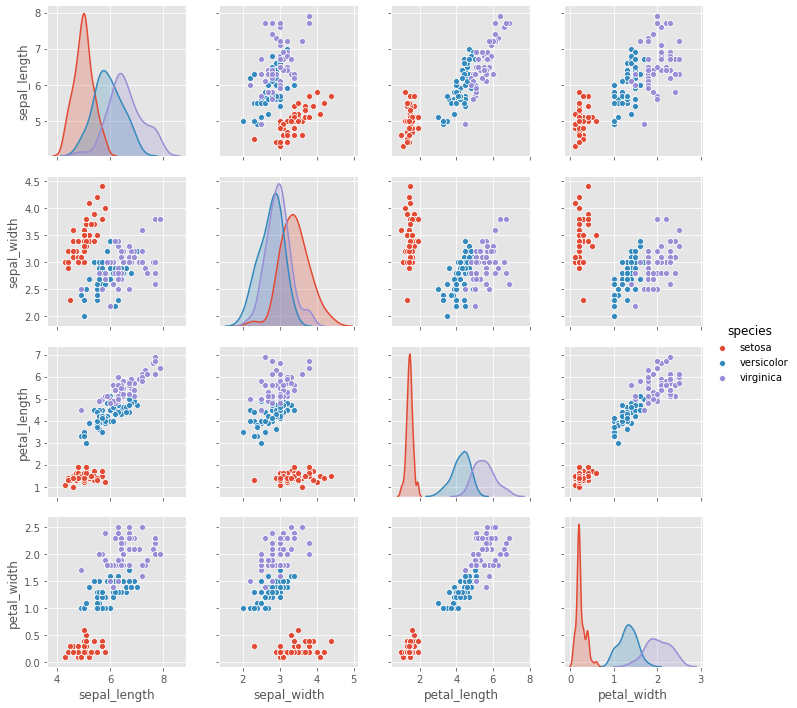

In [6]:
#Scatter plots and kdes.
sns.pairplot(df, hue= 'species');

Two Dimensions

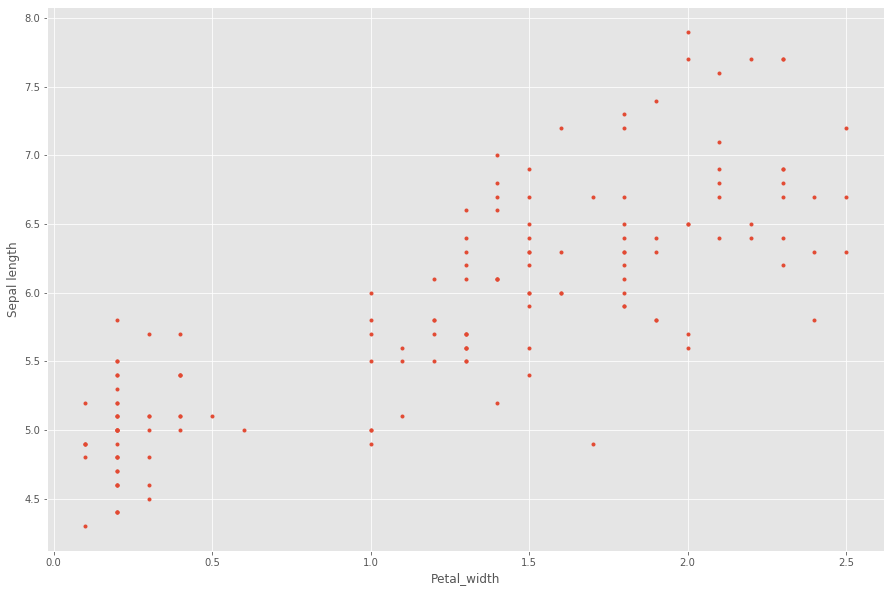

In [7]:
#New figure.
fig, ax= plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'],'.')

# Set axis Labels.
ax.set_xlabel('Petal_width');
ax.set_ylabel('Sepal length');


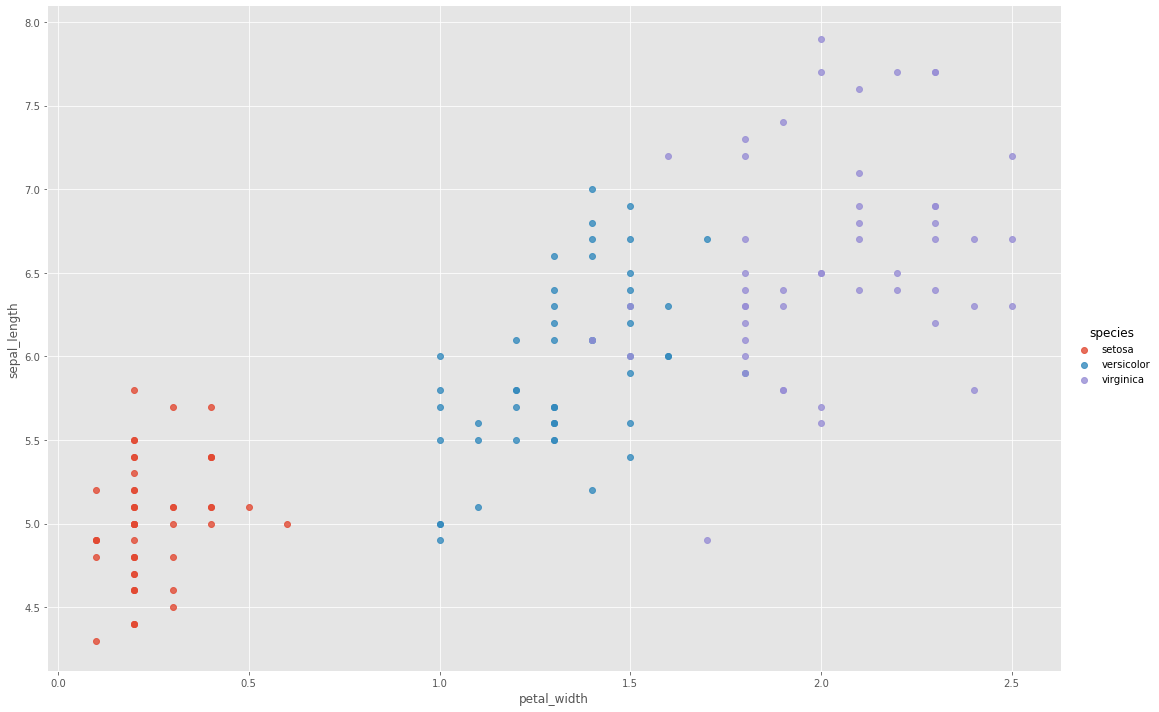

In [8]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y ="sepal_length", hue="species", data= df, fit_reg=False, height = 10, aspect=1.5);

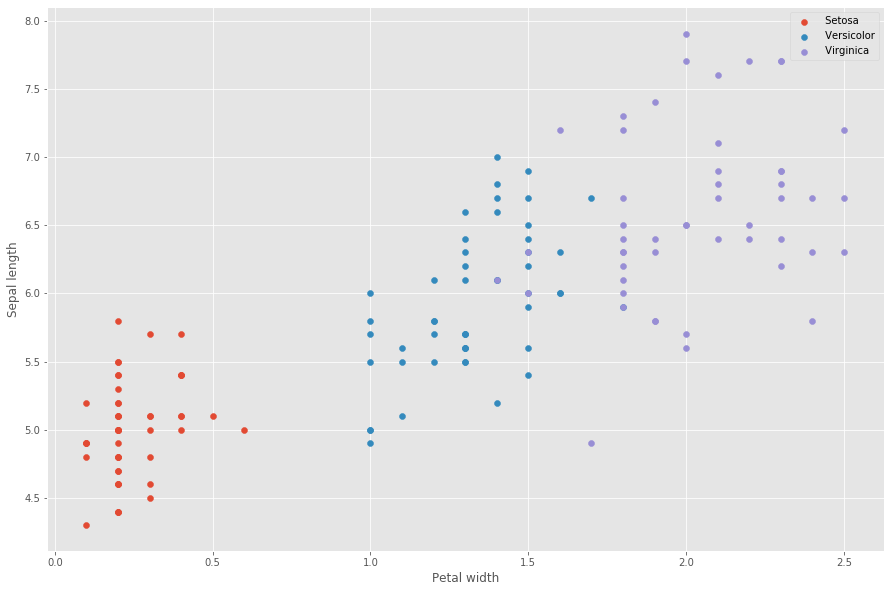

In [9]:
#Segregate the data.
setos = df[df['species']=='setosa']
versi = df[df['species']=='versicolor']
virgi = df[df['species']=='virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots
ax.scatter(setos['petal_width'], setos['sepal_length'], label=' Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label=' Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label=' Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();


In [11]:
# How the segreation works.
df['species'] =='virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [13]:
df[df['species']=='virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


# Using groupby()


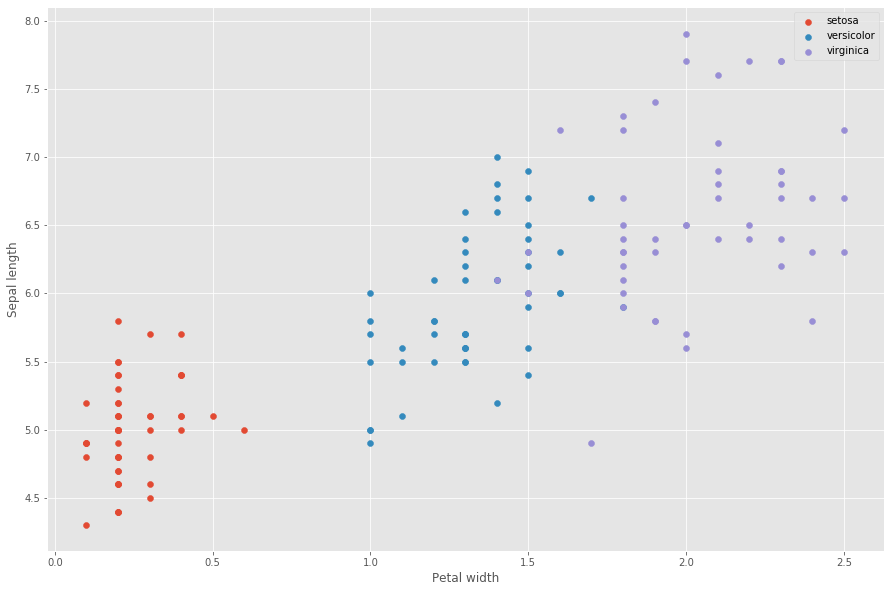

In [15]:
#New plot
fig, ax = plt.subplots()

#Using pandas groupby()

for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'],data['sepal_length'], label=species)
    
# Show the legend
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [18]:
#Group by typically takes a categorical variable.
x= df.groupby('species')
x


In [20]:
# Pivot tables
x.mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [21]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is : '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is : 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is : 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is : 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



Test and Train Split


In [26]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [27]:
# SHow some training data.
train.head()


,sepal_length,sepal_width,petal_length,petal_width,species
115,6.4,3.2,5.3,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
116,6.5,3.0,5.5,1.8,virginica
134,6.1,2.6,5.6,1.4,virginica
3,4.6,3.1,1.5,0.2,setosa


In [28]:
# The indices of the train array.
train.index

Int64Index([115, 146, 116, 134,   3, 137, 131,  74, 100,  15,
            ...
             95,  54,  58,   5,  77, 138,  92, 140, 147,  25],
           dtype='int64', length=112)

In [29]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
102,7.1,3.0,5.9,2.1,virginica
21,5.1,3.7,1.5,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa


Two dimentions : test train split

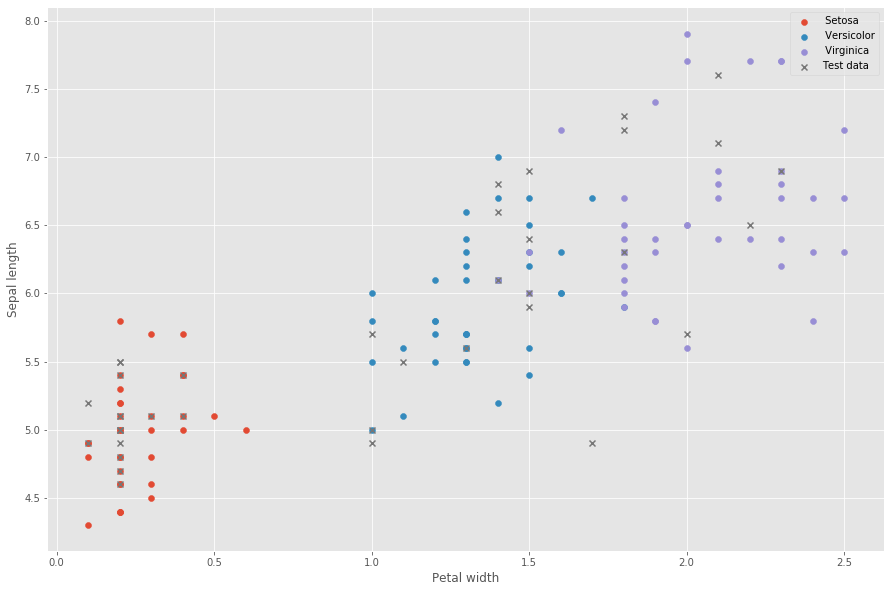

In [30]:
#Segregate the training data.
setos = train[train['species']=='setosa']
versi = train[train['species']=='versicolor']
virgi = train[train['species']=='virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data. 
ax.scatter(setos['petal_width'], setos['sepal_length'], marker = 'o', label=' Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker = 'o', label=' Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker = 'o', label=' Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();


Two Dimensions: inputs and outputs

In [31]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [32]:
# Peek at the inputs.
inputs.head()

,sepal_length,petal_width
115,6.4,2.3
146,6.3,1.9
116,6.5,1.8
134,6.1,1.4
3,4.6,0.2


In [33]:
#Peek at the outputs.
outputs.head()

115    virginica
146    virginica
116    virginica
134    virginica
3         setosa
Name: species, dtype: object

Two Dimensions:Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [39]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state = 0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Ask the classifire to classify the test data.
predictions= lre.predict(test[['sepal_length','petal_width']])
predictions

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa'], dtype=object)

In [37]:
#Eyeball the misclassifications.
predictions == test['species']

51     False
105     True
102     True
21      True
10      True
113     True
4       True
63      True
106     True
125     True
79      True
107     True
120     True
19      True
52      True
104     True
39      True
1       True
78     False
75      True
80      True
61     False
47      True
46      True
93      True
35      True
2       True
103     True
33      True
49      True
57      True
94      True
36      True
16      True
24      True
32      True
76      True
9       True
Name: species, dtype: bool

In [38]:
# What proportion were correct?
lre.score(test[['sepal_length','petal_width']], test['species'])

0.9210526315789473

Two dimenssions : Misclassified

In [52]:
# Append a column to the test data frame with teh predictions.
test['predicted']= predictions
test.head()

C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
51,6.4,3.2,4.5,1.5,versicolor,virginica
105,7.6,3.0,6.6,2.1,virginica,virginica
102,7.1,3.0,5.9,2.1,virginica,virginica
21,5.1,3.7,1.5,0.4,setosa,setosa
10,5.4,3.7,1.5,0.2,setosa,setosa


In [53]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
51,6.4,3.2,4.5,1.5,versicolor,virginica
78,6.0,2.9,4.5,1.5,versicolor,virginica
61,5.9,3.0,4.2,1.5,versicolor,virginica


In [54]:
# Eyeball the descriptive statistics for the species.
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.969697,3.357576,1.472727,0.257576
versicolor,5.931579,2.768421,4.286842,1.334211
virginica,6.582927,2.987805,5.517073,2.036585


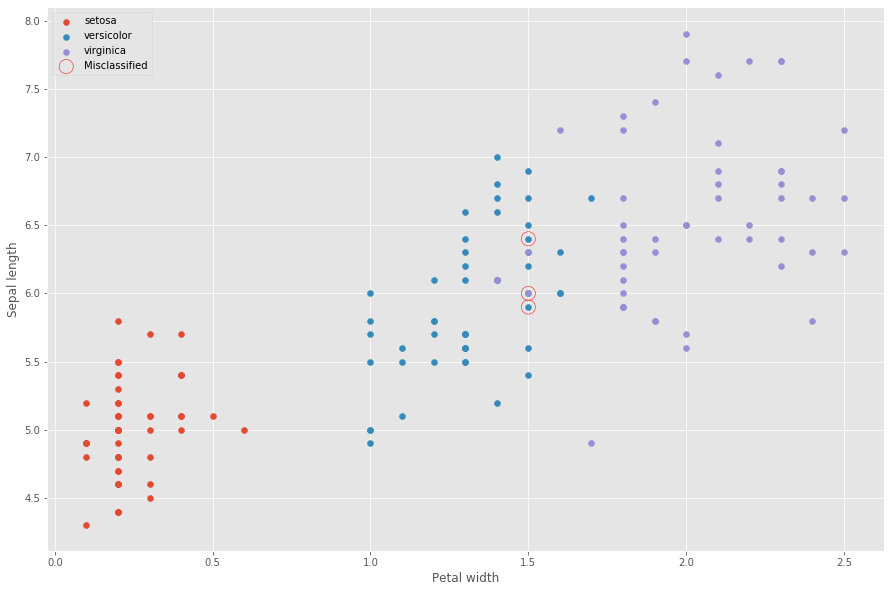

In [55]:
# New plot.
fig,ax =plt.subplots()

#Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
#Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s= 200, facecolor ='none', edgecolor ='r', label = 'Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

Separating Setosa

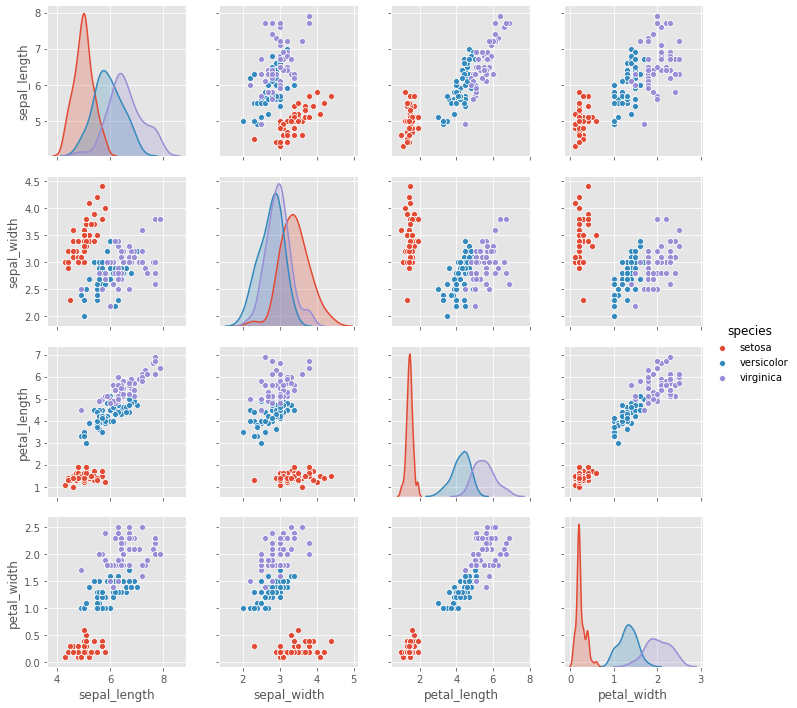

In [59]:
# Another look at this plot.
sns.pairplot(df, hue ='species');

In [67]:
# Give the inputs and outputs convenient names. 
inputs = train[['sepal_length','petal_width']]

#Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x : x  if  x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

array(['other', 'setosa'], dtype=object)

In [68]:
#create a new classifire
lre = lm.LogisticRegression(random_state=0)

# train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
actual = test['species'].apply(lambda x: x if x =='setosa'else 'other')

# What proportion were correct? 
lre.score(test[['sepal_length','petal_width']],actual)

1.0

Using All possible inputs


In [110]:
# Load the irish data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [111]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [112]:
#Use all four possible inputs
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

In [113]:
#create a new classifire
lre = lm.LogisticRegression(random_state=0)

# train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
#Ask the classifire to classify the test data.
predictions= lre.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions

array(['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor'], dtype=object)

In [115]:
# eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     37
False     1
Name: species, dtype: int64

In [116]:
# what proportion were correc?
lre.score(test[['sepal_length','sepal_width','petal_length','petal_width']], test['species'])


0.9736842105263158

k nearest neighbours classifier


In [144]:
# Load the irish data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [145]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [146]:
#Use all four possible inputs
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

In [147]:
# slassifier
knn = nei.KNeighborsClassifier()

In [148]:
# Fit.
knn.fit(inputs,outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [149]:
# Test 
knn.score(test[['sepal_length','sepal_width','petal_length','petal_width']], test['species'])

1.0

In [150]:
# predict.
predictions= lre.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
(predictions == test['species']).value_counts()

True    38
Name: species, dtype: int64

In [151]:
# The score is just the accuracy in this ase
(predictions == test['species']).value_counts(normalize = True)

True    1.0
Name: species, dtype: float64

Cross Validation


In [152]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores


C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98039216, 0.98039216, 1.        ])

In [153]:
print(f"Mean:{scores.mean()}\t Standard Deviation:{scores.std()}")

Mean:0.9869281045751634	 Standard Deviation:0.009243225897863385


In [155]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores


C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

array([0.96078431, 0.92156863, 0.95833333])

In [156]:
print(f"Mean:{scores.mean()} \t Standard Deviation:{scores.std()}")

Mean:0.9468954248366014 	 Standard Deviation:0.017936681699428268
